In [1]:
%load_ext rpy2.ipython

In [56]:
%%R
setwd("/CGF/Bioinformatics/Production/Wen/20180911_snakemake_coverage_tools")
data <- read.table("exomeCQA_CCSS3_CCSS/CCSS_score_bash.chrALL", header = FALSE, sep = "\t")
class(summary(data[,3]))
names(summary(data[,3]))
summary_ccs <- summary(data[,3])
summary_ue <- summary(data[,4])
table_exomeCQA <- rbind(summary_ccs, summary_ue)
names(table_exomeCQA) <- c( "Min", "1st.Qu", "Median", "Mean", "3rd.Qu", "Max")
#data.frame(table_exomeCQA)
dim(table_exomeCQA)
write.table(table_exomeCQA,file="test.csv",sep=",")
#write.table(summary_ccs,file="exomeCQA_CCSS3_CCSS/CCS_summary.txt",sep="\t")
#print(summary(data[,3]))
#sink()\
#summary_ccs

-- Duplication rate plot

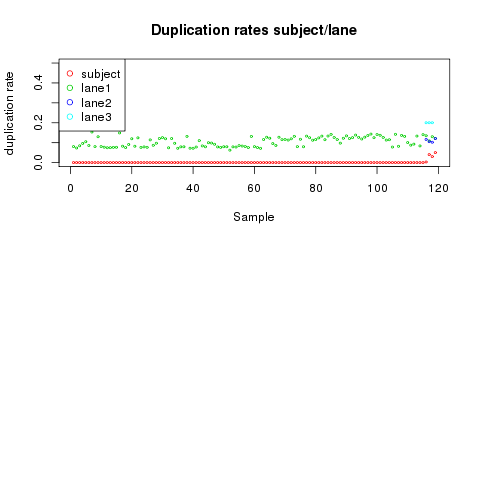

In [25]:
%%R
no_col <- (max(count.fields("/CGF/Bioinformatics/Production/Wen/20180911_snakemake_coverage_tools/ExomeQcPipeline/deduplication/merged_dup_rate.txt", sep = "\t")) -1)
#colors <- c(rgb(0, 0, 1, .3), rgb(1, 0, 0, .3), rgb(0, 1, 0, .3),rgb(.75, .75, .75, .3) )
data <- read.table("/CGF/Bioinformatics/Production/Wen/20180911_snakemake_coverage_tools/ExomeQcPipeline/deduplication/merged_dup_rate.txt", header = FALSE, fill=TRUE, sep = "\t",col.names=c("SUBJECT", 1:no_col) )
par(mfrow = c(2, 1))
matplot(data,pch=1,ylim= c(0, 0.5),col = 1:no_col, xlab= "Sample", ylab= "duplication rate", cex = 0.4)
#still need to set the legend name to no_col
legend("topleft", legend = c( "subject", "lane1","lane2", "lane3"),pch=1, col = 2:no_col)
title(main= "Duplication rates subject/lane",sub= "", cex=0.6)


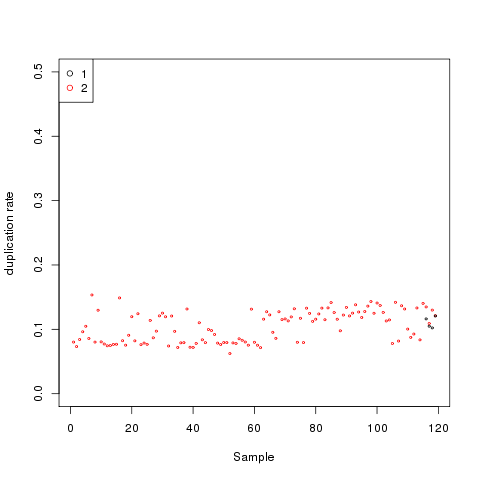

In [32]:
%%R
no_col <- (max(count.fields("/CGF/Bioinformatics/Production/Wen/20180911_snakemake_coverage_tools/ExomeQcPipeline/lane_dup_rate.txt", sep = "\t")) -1)
data <- read.table("/CGF/Bioinformatics/Production/Wen/20180911_snakemake_coverage_tools/ExomeQcPipeline/lane_dup_rate.txt", header = FALSE, fill=TRUE, sep = "\t",col.names=c("SUBJECT", 1:no_col) )
matplot(data,pch=1,ylim= c(0, 0.5),col = 1:no_col, xlab= "Sample", ylab= "duplication rate", cex = 0.4)
legend("topleft", legend = c(1:no_col),pch=1, col = 1:no_col)

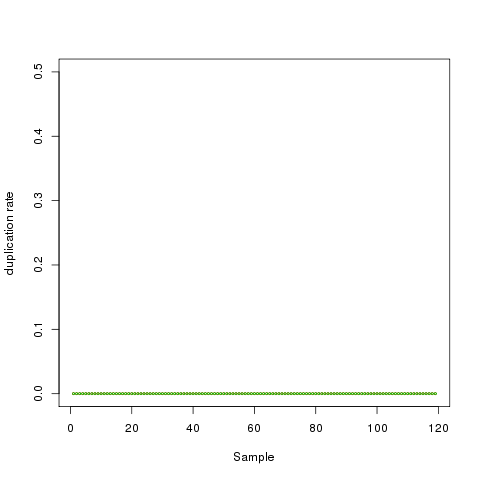

In [31]:
%%R
data <- read.table("/CGF/Bioinformatics/Production/Wen/20180911_snakemake_coverage_tools/ExomeQcPipeline/subject_dup_rate.txt", header = FALSE, sep = "\t" )
matplot(data,pch=1,ylim= c(0, 0.5), xlab= "Sample", ylab= "duplication rate", cex = 0.4)
#legend("topleft", legend = c(1:no_col),pch=1, col = 1:no_col)

-- Bam contamination plot

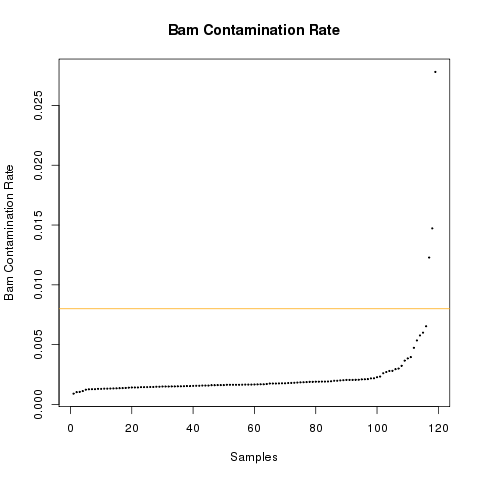

In [14]:
%%R
data <- read.table("/DCEG/Projects/Exome/builds/build_SR0403-001_Mexican_breast_cancer_2019_22639/QC/subject_level_BAM_contamination/results/bam_location.txt.all.output", header = TRUE, sep = "\t" )

#order(data$Contamination_rate)
sortData <- data[with(data, order(data$Contamination_rate)), ]
plot(sortData$Contamination_rate, xlab="Samples", ylab="Bam Contamination Rate", pch=20, cex = 0.4)
title(main= "Bam Contamination Rate",sub= "", cex=0.6)
abline(h=0.008,col="orange")

-- Postcalling QC plot

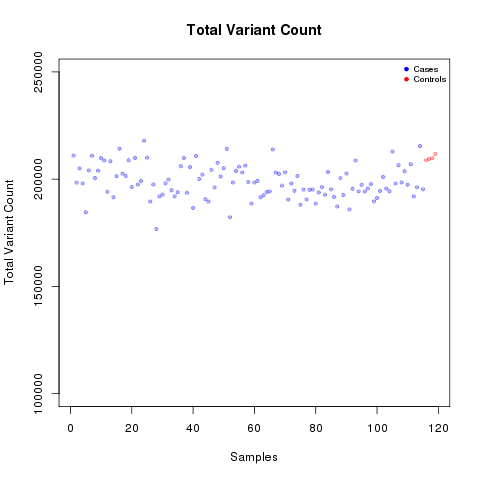

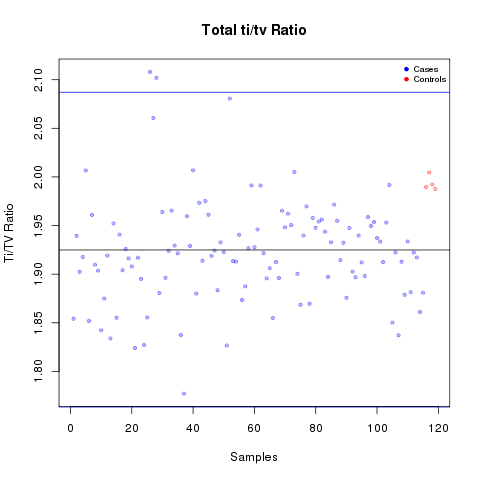

In [23]:
%%R
data <- read.table("/CGF/Bioinformatics/Production/Wen/20180911_snakemake_coverage_tools/ExomeQcPipeline/postcalling_qc/titv.txt", header = TRUE, sep = "\t" )
colors <- c(rgb(0, 0, 1, .3), rgb(1, 0, 0, .3), rgb(.75, .75, .75, .3), rgb(0, 1, 0, .3))

plot(data$TOTAL, xlab="Samples", ylab="Total Variant Count", pch=20,ylim=c(100000,250000), col= colors[data$CACO])
title(main= "Total Variant Count",sub= "", cex=0.6)
#plot(data$TOTAL, xlab="Samples", ylab="Total Variant Count", pch=20, col= colors[data$STATUS], cex = 0.4)
#title(main= "Sample Coverage across 238 CpG genes",sub= "", cex=0.6)
legend("topright", legend = c("Cases", "Controls"), col = c("blue", "red"), pch = 19, cex=0.7, bty="n")
plot(data$RATIO, xlab="Samples", ylab="Ti/TV Ratio", pch=20,col= colors[data$CACO])
title(main= "Total ti/tv Ratio",sub= "", cex=0.6)
ave_ratio=mean(data$RATIO)
sd_ratio=sd(data$RATIO)*3
abline(h=ave_ratio)
abline(h=ave_ratio+sd_ratio,col="blue")
abline(h=ave_ratio-sd_ratio,col="blue")
legend("topright", legend = c("Cases", "Controls"), col = c("blue", "red"), pch = 19, cex=0.7, bty="n")


 [1] A>G C>T G>A T>C A>C A>T C>A C>G G>C G>T T>A T>G
Levels: A>C A>G A>T C>A C>G C>T G>A G>C G>T T>A T>C T>G


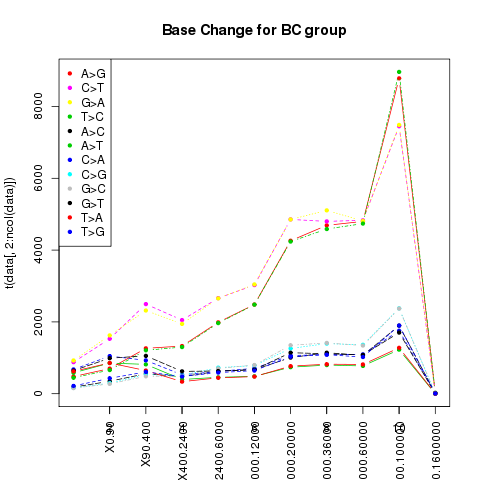

In [44]:
%%R

colMax <- function(data) sapply(data, max, na.rm = TRUE)
data <- read.table("/CGF/Bioinformatics/Production/Wen/20180911_snakemake_coverage_tools/ExomeQcPipeline/postcalling_qc/basechange_BC.txt", header = TRUE, sep = "\t" )
data[,1]
#c(1:4)
matplot(t(data[,2:ncol(data)]), type = c("b"),pch=20,col = data[,1]) #plot
title(main= "Base Change for BC group",sub= "", cex=0.6)
legend("topleft", legend = data[,1], col=data[,1], pch=20)
axis(1, at=2:ncol(data), labels=colnames(data[,2:ncol(data)]),las=2)
#axis(2, at=c(1000,10000), las=2)
data[,1]
#colMax(data)

 [1] "A.C" "A.G" "A.T" "C.A" "C.G" "C.T" "G.A" "G.C" "G.T" "T.A" "T.C" "T.G"


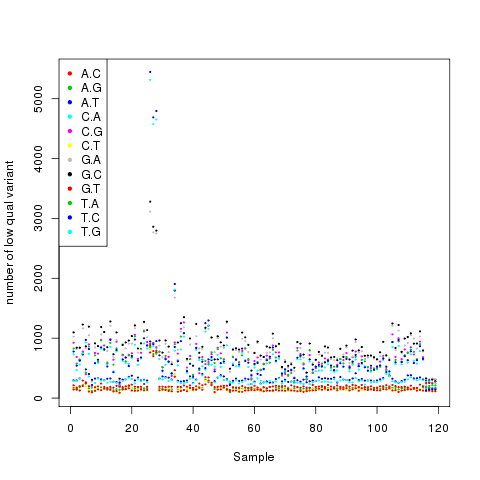

In [29]:
%%R
data <- read.table("/CGF/Bioinformatics/Production/Wen/20180911_snakemake_coverage_tools/ExomeQcPipeline/postcalling_qc/low_qual_basechange.txt", header = TRUE, sep = "\t" )
#matplot(data[2,pch=20, xlab= "Sample", ylab= "number of low qual variant", col = colnames(data[,2:ncol(data)]),cex = 0.4)
#legend("topleft", legend = colnames(data[,2:ncol(data)]),col = colnames(data[,2:ncol(data)]), pch=20)
matplot(data,pch=20, xlab= "Sample", ylab= "number of low qual variant", col = c(2:ncol(data)),cex = 0.4)
legend("topleft", legend = colnames(data[,2:ncol(data)]),col = c(2:ncol(data)), pch=20)
colnames(data[,2:ncol(data)])

In [59]:
%%R
data=read.csv("test.csv",header=TRUE,row.names=1)
data
#summary_ue <- read.table("ExomeQcPipeline/exomeCQA/summary_ue.txt", header = TRUE)
#summary_ccs <- read.table("ExomeQcPipeline/exomeCQA/summary_ccs.txt", header = TRUE)
#table_exomeCQA <- rbind(data.frame(summary_ccs), data.frame(summary_ue))
#length(table_exomeCQA)
#data.frame(summary_ccs)
#colnames(summary_ccs)
#dim(summary_ccs)
#names(table_exomeCQA)
#names(table_exomeCQA) <- c( "Min", "1st.Qu", "Median", "Mean", "3rd.Qu", "Max")
#table_exomeCQA <- data.frame(c("CCS", "Ue Score"),rbind(data.frame(summary_ccs), data.frame(summary_ue)))
#table_exomeCQA
#names(table_exomeCQA) <- c("Type", "Min", "1st.Qu", "Median", "Mean", "3rd.Qu", "Max")
#names(table_exomeCQA) <- c("Type", "Min")
#table_exomeCQA

            Min. X1st.Qu.  Median       Mean X3rd.Qu.   Max.
summary_ccs    0 0.000000 0.00000 0.04311555  0.00000   1.00
summary_ue     0 1.344395 1.56329 1.92207235  1.88653 212.91


In [57]:
%%bash
head -n 5 test.csv

"Min.","1st Qu.","Median","Mean","3rd Qu.","Max."
"summary_ccs",0,0,0,0.043115546991635,0,1
"summary_ue",0,1.344395,1.56329,1.92207235369969,1.88653,212.91


In [5]:
%%bash
head -5 exomeCQA_CCSS3_CCSS/CCSS_score_bash.chrALL

chr1	WASH7P	0	0
chr1	WASH7P	0	2.03405
chr1	WASH7P	0	1.33838
chr1	WASH7P	1	0
chr1	WASH7P	1	0


In [8]:
%%R
summary(data[,4])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   1.344   1.563   1.922   1.887 212.910 


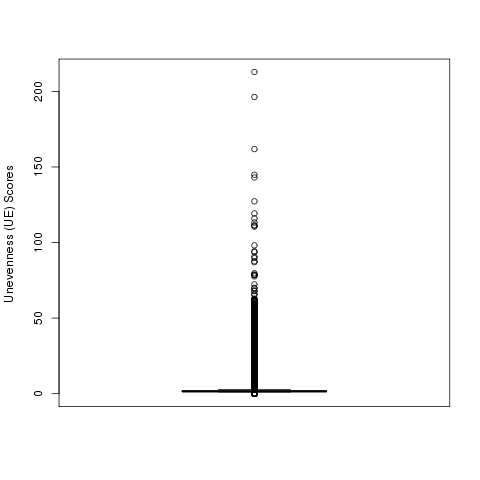

In [40]:
%%R
boxplot(data[,4],ylab = "Unevenness (UE) Scores ")

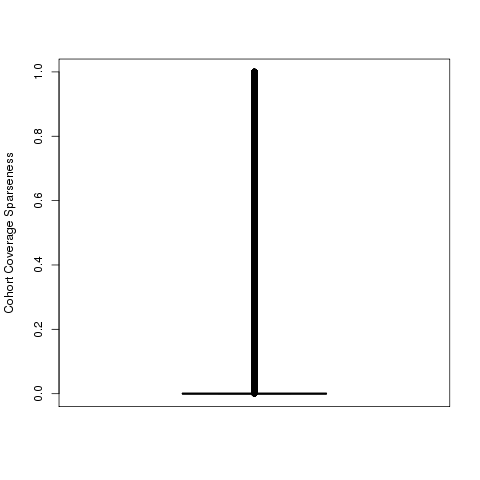

In [39]:
%%R
boxplot(data[,3],ylab = "Cohort Coverage Sparseness")

In [18]:
%%R
data_precalling <- read.table("pre_calling_qc_report_10182018.txt", header = TRUE, sep = "\t")
names(data_precalling)
sortData <- data_precalling[with(data_precalling, order(data_precalling$OXIDATION_Q_AVE)), ]
plot(sortData$OXIDATION_Q_AVE,ylab = "Average_Oxidation_Q", main = "CollectOxidationMetrics")
boxplot(data_precalling$OXIDATION_Q_AVE)
boxplot(data_precalling$LOWEST_PREADATPER_TOTAL_QSCORE ~ data_precalling$LOWEST_PREADATPER_TOTAL_QSCORE_BASE)


Error in file(file, "rt") : cannot open the connection


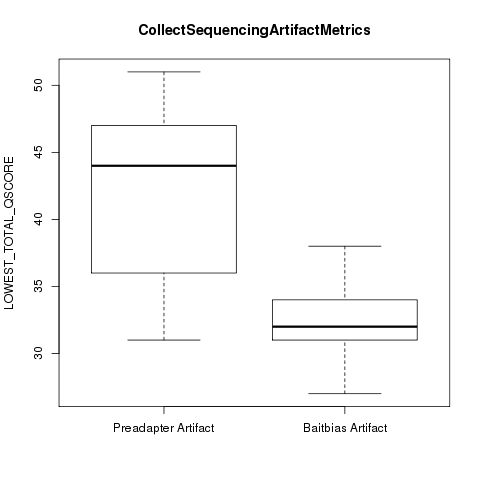

In [23]:
%%R
boxplot(data_precalling$LOWEST_PREADATPER_TOTAL_QSCORE,data_precalling$LOWEST_BAITBIAS_TOTAL_QSCORE, names = c("Preadapter Artifact", "Baitbias Artifact"),ylab = "LOWEST_TOTAL_QSCORE", main = "CollectSequencingArtifactMetrics",  outline=FALSE)

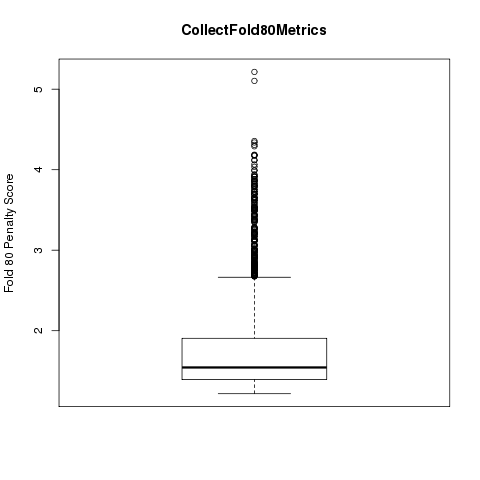

In [35]:
%%R
boxplot(as.numeric(as.character(data_precalling$FOLD_80_BASE_PENALTY)),ylab = "Fold 80 Penalty Score", main = "CollectFold80Metrics",  outline=TRUE)

In [42]:
%%R
names(data_precalling)

 [1] "Analysis.ID"                         "AVERAGE_READ_LENGTH"                
 [3] "PERCENT_TOTAL_READS_WITH_3LESS_CUT"  "PF_HQ_MEDIAN_MISMATCHES"            
 [5] "PF_HQ_MISMATCH_RATE_F"               "PF_HQ_MISMATCH_RATE_R"              
 [7] "STRAND_BALANCE_F"                    "STRAND_BALANCE_R"                   
 [9] "BAD_CYCLES"                          "PCT_CHIMERAS"                       
[11] "PCT_ADAPTER"                         "PERCENT_PF_HQ_ALIGNED_READS"        
[13] "PERCENT_PF_HQ_ALIGNED_BASES_L"       "PERCENT_PF_HQ_ALIGNED_Q20_BASES_L"  
[15] "PERCENT_PF_HQ_ALIGNED_BASES_R"       "PERCENT_PF_HQ_ALIGNED_Q20_BASES_R"  
[17] "PERCENT_BASES_Q_37UP"                "PERCENT_BASES_Q_22DOWN"             
[19] "AT_DROPOUT"                          "GC_DROPOUT"                         
[21] "HS_AT_DROPOUT"                       "HS_GC_DROPOUT"                      
[23] "FOLD_80_BASE_PENALTY"                "MEDIAN_INSERT_SIZES"                
[25] "MEAN_INSERT_SIZES"    

In [11]:
%%R
data <- read.csv("/CGF/Bioinformatics/Production/Eric/Projects/GwasQcPipelineTests/PLCO_batch1_9/sex_plot/subject_qc.csv")
femData <- subset(data, Expected_Sex == "F")
fem_X <- runif(nrow(femData), .8, 1.2)#get a random uniformed number from 0.8 to 1.2 for each row
femData[1,]
nrow(femData)
#fem_X

[1] 19636


           [,1]      [,2]      [,3]      [,4]
 [1,] 18.204141 16.386091 12.178908  8.977997
 [2,] 14.930671 18.509708  6.652016  1.424059
 [3,]  4.889157 16.017290 15.283725 14.416349
 [4,]  4.892061  4.812209 18.945666 17.557994
 [5,]  1.953888 14.807666 13.181267 18.055117
 [6,]  3.023922 15.420288 16.061154 19.988437
 [7,]  6.425393  4.652609  7.231264 12.015283
 [8,] 14.835259 11.183394 16.610672  4.028005
 [9,] 12.019196 15.323520 10.384771 16.583248
[10,]  1.719247 19.299175  1.250465  1.110159


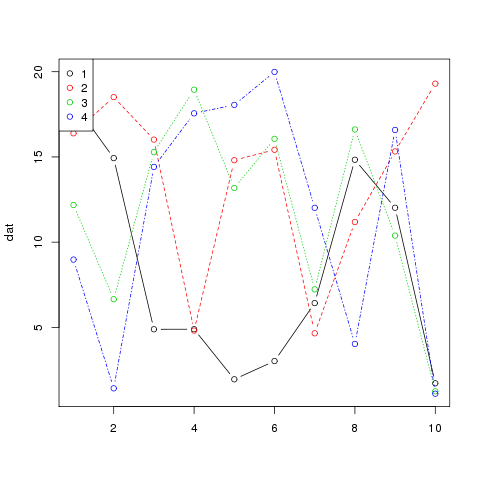

In [31]:
%%R
dat <- matrix(runif(40,1,20),ncol=4)#make data
dat
matplot(dat, type = c("b"),pch=1,col = 1:4) #plot
legend("topleft", legend = 1:4, col=1:4, pch=1)
dat

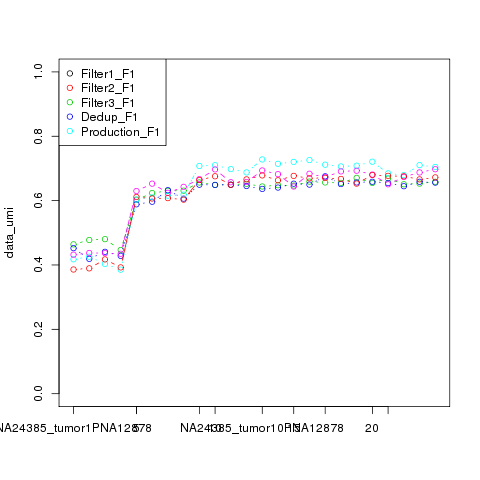

In [33]:
%%R
data_umi <- read.table("/CGF/Bioinformatics/Production/Wen/20180911_snakemake_coverage_tools/benchmark_umi_filter1_F1.txt", header = TRUE, sep = "\t")
data_umi
matplot(data_umi, type = c("b"),pch=1,col = 2:6, ylim= c(0, 1)) 
legend("topleft", legend = c("Filter1_F1", "Filter2_F1", "Filter3_F1", "Dedup_F1", "Production_F1"), col=1:5, pch=1) # optional legend
#axis(1, at=1:nrow(data_umi), labels=data_umi$Mutect2_original_filter_on_SNP)
axis(1, at=c(1,5,9,13,17,21), labels=c("NA24385_tumor1PNA12878","NA24385_tumor2PNA12878","NA24385_tumor5PNA12878","NA24385_tumor10PNA12878","NA24385_tumor20PNA12878","NA24385_tumor50PNA12878"))

-- Gender Check

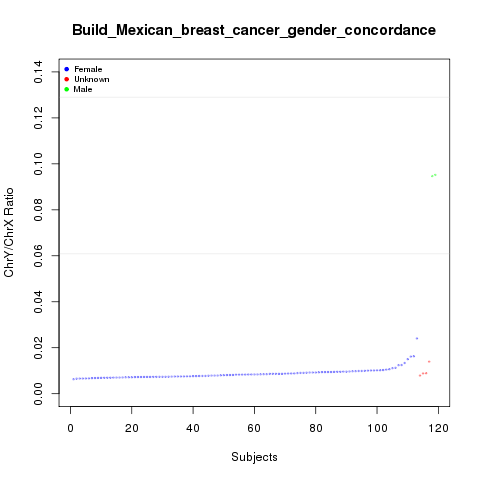

In [42]:
%%R
data_gender <- read.table("/CGF/Bioinformatics/Production/Wen/20180911_snakemake_coverage_tools/ExomeQcPipeline/gender_check/XYratio_table.txt", header = TRUE, sep = "\t")
colors <- c(rgb(0, 0, 1, .3), rgb(1, 0, 0, .3), rgb(0, 1, 0, .3),rgb(.75, .75, .75, .3) )
sortData <- data_gender[with(data_gender, order(data_gender$IDE2TI1ILER_GENDER,data_gender$YXratio)), ]
plot(sortData$YXratio, xlab="Subjects", ylab="ChrY/ChrX Ratio", pch=20, col= colors[sortData$IDE2TI1ILER_GENDER], cex = 0.5, ylim= c(0, 0.14))
title(main= "Build_Mexican_breast_cancer_gender_concordance",sub= "", cex=0.6)
legend("topleft", legend = c("Female", "Unknown", "Male"), col = c("blue", "red", "green"), pch = 19, cex=0.7, bty="n")
#mean(sortData$YXratio(sortData$IDE2TI1ILER_GENDER=3))
newdata <- subset(sortData, IDE2TI1ILER_GENDER==3, select=YXratio)
colMeans(newdata)
sd(sortData$YXratio)
abline(h=colMeans(newdata)+3*sd(sortData$YXratio),col=colors[4])
abline(h=colMeans(newdata)-3*sd(sortData$YXratio),col=colors[4])

In [10]:
%%R
#plot(data_precalling$OXIDATION_Q_AVE, xlab="Samples", ylim = c(0, 100), ylab="Oxidataion_ave_Q(%)", pch=20, cex = 0.4, axes=F)
help(matplot)

R Help on ‘matplot’matplot                package:graphics                R Documentation

_P_l_o_t _C_o_l_u_m_n_s _o_f _M_a_t_r_i_c_e_s

_D_e_s_c_r_i_p_t_i_o_n:

     Plot the columns of one matrix against the columns of another.

_U_s_a_g_e:

     matplot(x, y, type = "p", lty = 1:5, lwd = 1, lend = par("lend"),
             pch = NULL,
             col = 1:6, cex = NULL, bg = NA,
             xlab = NULL, ylab = NULL, xlim = NULL, ylim = NULL,
             ..., add = FALSE, verbose = getOption("verbose"))
     
     matpoints(x, y, type = "p", lty = 1:5, lwd = 1, pch = NULL,
               col = 1:6, ...)
     
     matlines (x, y, type = "l", lty = 1:5, lwd = 1, pch = NULL,
               col = 1:6, ...)
     
_A_r_g_u_m_e_n_t_s:

     x,y: vectors or matrices of data for plotting.  The number of rows
          should match.  If one of them are missing, the other is taken
          as ‘y’ and an ‘x’ vector of ‘1:n’ is used.  Missing val